In [1]:
import numpy as np
import pickle
import os

import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-
#glr-auto-examples-model-selection-plot-confusion-matrix-py
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots(figsize=(5, 5))
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    plt.rcParams.update({'font.size': 13})
    
    plt.tight_layout()
    
    fig.savefig('imgs/' + title + '.png', dpi=300)

In [3]:
EXP_FOLDER = './experiments/test/lstm/'

In [4]:
files = os.listdir(EXP_FOLDER)

print('Files:', len(files))
print(files)

files = [f for f in files if f[-1] == 'l']

print('Files:', len(files))
print(files)

Files: 7
['exp-lstm-generalisation.py', 'lstm-small.pkl', 'lstm-small.pkl.pt', 'lstm-solids.pkl', 'lstm-solids.pkl.pt', 'lstm-textures.pkl', 'lstm-textures.pkl.pt']
Files: 3
['lstm-small.pkl', 'lstm-solids.pkl', 'lstm-textures.pkl']


In [9]:
EXP = 2

with open(EXP_FOLDER + files[EXP], 'rb') as f:
    # Train set information
    FOLDER_TRAIN = pickle.load(f)
    FOLDER_TEST = pickle.load(f)
    CLASSES = pickle.load(f)

    WINDOW = pickle.load(f)
    ELECTRODES = pickle.load(f)

    # Model information
    input_size = pickle.load(f)
    hidden_size = pickle.load(f)
    dropout = pickle.load(f)
    learning_rate = pickle.load(f)
    l2_reg = pickle.load(f)
    step_size = pickle.load(f)
    lr_decay = pickle.load(f)

    # Training information
    FOLDS = pickle.load(f)

    cv_loss_history = pickle.load(f)
    cv_loss_history_val = pickle.load(f)
    cv_accuracy_history = pickle.load(f)
    cv_accuracy_history_val = pickle.load(f)

    cv_precision = pickle.load(f)
    cv_recall = pickle.load(f)
    cv_f1_score = pickle.load(f)
    cv_conf_matrix = pickle.load(f)

input_size 24 hidden_size 32


Text(0.5,1,'accuracy')

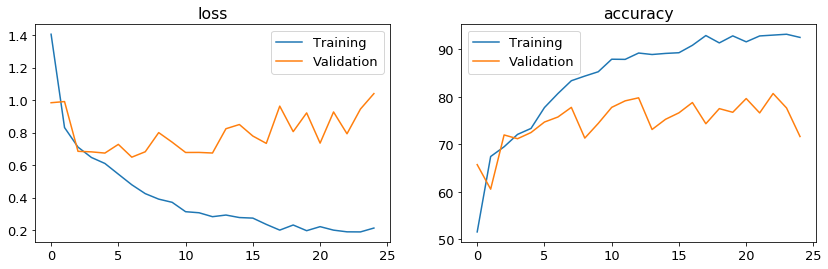

In [13]:
# Model information
print('input_size', input_size, 'hidden_size', hidden_size)

# Training information
FOLD = 0
plt.subplots(1, 2, figsize=(14,4))

plt.subplot(1, 2, 1)
plt.plot(cv_loss_history[FOLD])
plt.plot(cv_loss_history_val[FOLD])
plt.legend(['Training', 'Validation'])
plt.title('loss')

plt.subplot(1, 2, 2)
plt.plot(cv_accuracy_history[FOLD])
plt.plot(cv_accuracy_history_val[FOLD])
plt.legend(['Training', 'Validation'])
plt.title('accuracy')

Confusion matrix, without normalization


<Figure size 432x288 with 0 Axes>

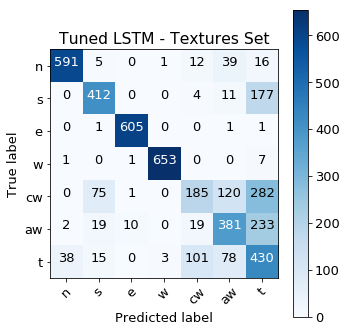

In [14]:
plt.figure()
plot_confusion_matrix(cv_conf_matrix[FOLD], normalize=False, classes=CLASSES, title='Tuned LSTM - Textures Set')

In [51]:
folds_ok = [0, 1, 2, 3]

cv_accuracy_history = list( cv_accuracy_history[i] for i in folds_ok )
cv_precision = list( cv_precision[i] for i in folds_ok )
cv_recall = list( cv_recall[i] for i in folds_ok )
cv_f1_score = list( cv_f1_score[i] for i in folds_ok )

In [15]:
np.array(cv_accuracy_history_val)[0]

array([65.73951435, 60.57395143, 71.98675497, 71.19205298, 72.49448124,
       74.70198675, 75.7615894 , 77.79249448, 71.32450331, 74.41501104,
       77.79249448, 79.1611479 , 79.8013245 , 73.13465784, 75.27593819,
       76.64459161, 78.80794702, 74.34878587, 77.52759382, 76.75496689,
       79.64679912, 76.62251656, 80.70640177, 77.66004415, 71.65562914])

In [10]:
print('accuracy:', np.mean(np.array(cv_accuracy_history_val)[:, -1]), "+/-", np.std(np.array(cv_accuracy_history_val)[:, -1]))
print('precision:', np.mean(np.array(cv_precision), axis=0), "+/-", np.std(np.array(cv_precision), axis=0))
print('recall:', np.mean(np.array(cv_recall), axis=0), "+/-", np.std(np.array(cv_recall), axis=0))
print('f1-score:', np.mean(np.array(cv_f1_score), axis=0), "+/-", np.std(np.array(cv_f1_score), axis=0))

print()
#print('accuracy:', np.mean(np.max(np.array(cv_accuracy_history_val))), "+/-", np.std(np.max(np.array(cv_accuracy_history_val), axis=1)))
print('accuracy:', np.mean(np.array(cv_accuracy_history_val)[:, -1]), "+/-", np.std(np.array(cv_accuracy_history_val)[:, -1]))
print('precision:', np.mean(np.mean(np.array(cv_precision), axis=0)), "+/-", np.mean(np.std(np.array(cv_precision), axis=0)))
print('recall:', np.mean(np.mean(np.array(cv_recall), axis=0)), "+/-", np.mean(np.std(np.array(cv_recall), axis=0)))
print('f1-score:', np.mean(np.mean(np.array(cv_f1_score), axis=0)), "+/-", np.mean(np.std(np.array(cv_f1_score), axis=0)))

accuracy: 73.80573951434879 +/- 1.9553365647712668
precision: [91.43025009 72.80154763 96.37690293 98.09950717 56.0555444  68.36228898
 40.01134136] +/- [1.13509902 5.83424835 1.66443965 0.99688518 7.19477729 6.41831135
 6.05960451]
recall: [93.40361446 73.67549669 99.14473684 99.03323263 45.91251885 64.09638554
 43.69924812] +/- [ 3.05748856  5.09869266  0.60117325  0.61619571 12.79461496 19.71283719
 13.12381408]
f1-score: [92.36659529 72.84595836 97.73686938 98.55848842 48.64146486 63.64975638
 40.81235075] +/- [ 1.23571686  1.45598449  1.09523819  0.36753673  6.15828635 11.68083734
  6.96342562]

accuracy: 73.80573951434879 +/- 1.9553365647712668
precision: 74.73391179468675 +/- 4.186195049578232
recall: 74.13789044760597 +/- 7.857830916079457
f1-score: 73.51592620675665 +/- 4.1367179404330905


In [24]:
accuracy = np.mean(np.array(cv_accuracy_history_val)[:, -1])
accstd = np.std(np.array(cv_accuracy_history_val)[:, -1])

precision = np.mean(np.array(cv_precision), axis=0)
precstd = np.std(np.array(cv_precision), axis=0)

recall = np.mean(np.array(cv_recall), axis=0)
recstd = np.std(np.array(cv_recall), axis=0)

fscore = np.mean(np.array(cv_f1_score), axis=0)
fscstd = np.std(np.array(cv_f1_score), axis=0)

In [25]:
print(accuracy, accstd)
print(np.concatenate((precision.reshape([-1, 1]), precstd.reshape([-1, 1])), axis=1))
print(np.concatenate((recall.reshape([-1, 1]), recstd.reshape([-1, 1])), axis=1))
print(np.concatenate((fscore.reshape([-1, 1]), fscstd.reshape([-1, 1])), axis=1))

73.80573951434879 1.9553365647712668
[[91.43025009  1.13509902]
 [72.80154763  5.83424835]
 [96.37690293  1.66443965]
 [98.09950717  0.99688518]
 [56.0555444   7.19477729]
 [68.36228898  6.41831135]
 [40.01134136  6.05960451]]
[[93.40361446  3.05748856]
 [73.67549669  5.09869266]
 [99.14473684  0.60117325]
 [99.03323263  0.61619571]
 [45.91251885 12.79461496]
 [64.09638554 19.71283719]
 [43.69924812 13.12381408]]
[[92.36659529  1.23571686]
 [72.84595836  1.45598449]
 [97.73686938  1.09523819]
 [98.55848842  0.36753673]
 [48.64146486  6.15828635]
 [63.64975638 11.68083734]
 [40.81235075  6.96342562]]
